# YOLOv8 Installation

In [ ]:
# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# # Access Google Drive Folder
# import os
# os.chdir("gdrive/MyDrive")

In [6]:
# Create YOLOv8 root folder
!mkdir yolov8-tensorrt

/bin/bash: /home/atin/miniconda/envs/trung_gst/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [7]:
# Go to YOLOv8 root folder
%cd yolov8-tensorrt

/home/atin/vutl/ONNX/yolov8-tensorrt


In [ ]:
# # Install YOLOv8
# %pip install ultralytics

# import ultralytics
# ultralytics.checks()

## Download the Model

In [ ]:
# # Download YOLOv8 model
# !wget https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8x.pt

# Tensorrt

In [ ]:
# !pip install tensorrt

In [ ]:
# !pip install tensorrt_lean

In [ ]:
# !pip install tensorrt_dispatch

In [ ]:
# !pip install onnx onnxsim onnxruntime-gpu

In [1]:
import tensorrt
print(tensorrt.__version__)
assert tensorrt.Builder(tensorrt.Logger())

10.14.1.48.post1


In [2]:
# Export YOLOv8 Model to Tensorrt
!yolo export model=yolov8n.pt format=engine half=True device=0 workspace=12

/bin/bash: /home/atin/miniconda/envs/trung_gst/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Ultralytics 8.3.227 🚀 Python-3.13.9 torch-2.8.0+cu129 CUDA:0 (NVIDIA RTX A4000, 15973MiB)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)
requirements: Ultralytics requirement ['onnxslim>=0.1.71'] not found, attempting AutoUpdate...

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [onnxslim]


requirements: AutoUpdate success ✅ 2.2s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.1 opset 20...
ONNX: slimming with onnxslim 0.1.74...
ONNX: export success ✅ 3.7s, saved as 'yolov8n.onnx' (12.3 MB)

TensorRT: starting export with TensorRT 10.14.1.48.post1...
[11/11/2025-16:41:19] [TRT] [I] [MemUsageChange] Init CUDA: CPU +0, GPU +0, now: CPU 736

## Inference on Image

In [ ]:
# Inference Using YOLOv8 Model
!yolo detect predict model=yolov8n.pt source="https://ultralytics.com/images/bus.jpg" device=0

In [ ]:
# Inference Using YOLOv8 Tensorrt
!yolo detect predict model=yolov8n.engine source="https://ultralytics.com/images/bus.jpg" device=0

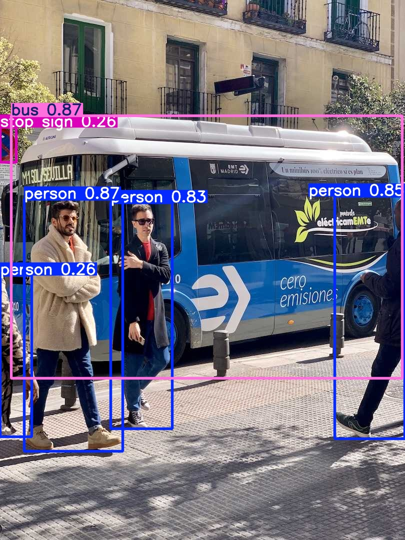

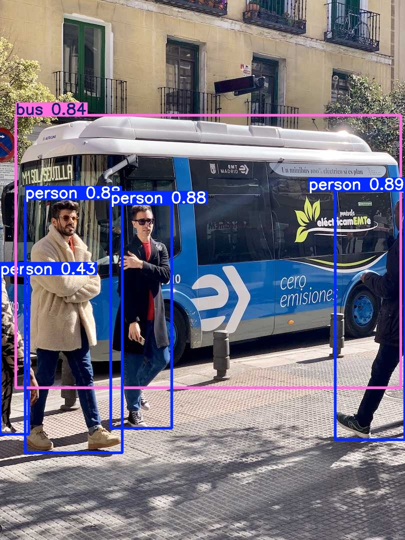

In [5]:
from PIL import Image
from IPython.display import display

# Load the images
image1 = Image.open("runs/detect/predict/bus.jpg")
image2 = Image.open("runs/detect/predict2/bus.jpg")

w, h = image1.size
new_width = int(w/2)
new_height = int(h/2)

# Resize the images
image1 = image1.resize((new_width, new_height))
image2 = image2.resize((new_width, new_height))

# Display the images side by side
display(image1, image2)

## mAP

In [6]:
# mAP Calculation YOLOv8 Model
!yolo detect val model=yolov8n.pt data=coco128.yaml iou=0.5 imgsz=640 name=yolov8n

/bin/bash: /home/atin/miniconda/envs/trung_gst/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Ultralytics 8.3.227 🚀 Python-3.13.9 torch-2.8.0+cu129 CUDA:0 (NVIDIA RTX A4000, 15973MiB)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 166.2±45.4 MB/s, size: 43.2 KB)
val: Scanning /home/atin/namnt/main/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 128/128 1.7Mit/s 0.0ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 2.7it/s 2.9s0.2ss
                   all        128        929      0.651       0.55      0.619      0.445
                person         61        254      0.811      0.681      0.776      0.532
               bicycle          3          6      0.604      0.333      0.303       0.26
                   car         12         46       0.77      0.217  

In [7]:
# mAP Calculation YOLOv8 Tensorrt
!yolo detect val model=yolov8n.engine data=coco128.yaml iou=0.5 imgsz=640 name=yolov8n-tensorrt

/bin/bash: /home/atin/miniconda/envs/trung_gst/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Ultralytics 8.3.227 🚀 Python-3.13.9 torch-2.8.0+cu129 CUDA:0 (NVIDIA RTX A4000, 15973MiB)
Loading yolov8n.engine for TensorRT inference...
[11/11/2025-16:55:47] [TRT] [I] Loaded engine size: 8 MiB
[11/11/2025-16:55:47] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in IExecutionContext creation: CPU +0, GPU +11, now: CPU 0, GPU 17 (MiB)
Setting batch=1 input of shape (1, 3, 640, 640)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2284.1±445.1 MB/s, size: 39.1 KB)
val: Scanning /home/atin/namnt/main/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 128/128 2.8Mit/s 0.0ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 128/128 102.1it/s 1.3s0.1s
                   all        128        929      0.687      0.547       0.62      0.453
                

## Inference on Video

In [2]:
# Download modules
!gdown https://drive.google.com/uc?id=1RskX1wXVF0xSMAPgpkU-EsaUv8tD7lvS

/bin/bash: /home/atin/miniconda/envs/trung_gst/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Downloading...
From: https://drive.google.com/uc?id=1RskX1wXVF0xSMAPgpkU-EsaUv8tD7lvS
To: /home/atin/vutl/ONNX/modules.zip
100%|██████████████████████████████████████| 5.79k/5.79k [00:00<00:00, 12.2MB/s]


In [3]:
# Unzip the modules
!unzip modules.zip

/bin/bash: /home/atin/miniconda/envs/trung_gst/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Archive:  modules.zip
  inflating: modules/autobackend.py  
  inflating: modules/utils.py        


In [4]:
# Create inference folder
!mkdir inference

/bin/bash: /home/atin/miniconda/envs/trung_gst/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [ ]:
# # Download the video
# !gdown https://drive.google.com/uc?id=11Z0BMXcKNdQmJNyBejWqU9V6z7gEloMZ

/bin/bash: /home/atin/miniconda/envs/trung_gst/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Downloading...
From: https://drive.google.com/uc?id=11Z0BMXcKNdQmJNyBejWqU9V6z7gEloMZ
To: /home/atin/vutl/ONNX/road.mp4
100%|██████████████████████████████████████| 10.1M/10.1M [00:01<00:00, 8.15MB/s]


In [5]:
# Move the video to inference folder
!mv road.mp4 inference/

/bin/bash: /home/atin/miniconda/envs/trung_gst/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [8]:
import torch
import cv2
import random
import time
import pathlib
from ultralytics import YOLO

import modules.utils as utils

def get_detection_result(model, frame):
    # Update object localizer
    results = model.predict(frame, imgsz=640, conf=0.5, verbose=False)
    result = results[0].cpu()

    # Get information from result
    box = result.boxes.xyxy.numpy()
    conf = result.boxes.conf.numpy()
    cls = result.boxes.cls.numpy().astype(int)

    return cls, conf, box

def detection(model_path, source, name):
    # Check File Extension
    file_extension = pathlib.Path(model_path).suffix

    # Load the Model
    model = YOLO(model_path)

    # Class Name and Colors
    label_map = model.names
    COLORS = [[random.randint(0, 255) for _ in range(3)] for _ in label_map]

    # FPS Detection
    frame_count = 0
    total_fps = 0
    avg_fps = 0

    # FPS Video
    video_cap = cv2.VideoCapture(source)
    total_frames = int(video_cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_width = int(video_cap.get(3))
    frame_height = int(video_cap.get(4))

    video_frames = []

    while video_cap.isOpened():
        ret, frame = video_cap.read()
        if not ret:
            break

        # # Start Time
        start = time.time()        
        # Detection
        cls, conf, box = get_detection_result(model, frame)

        # Pack together for easy use
        detection_output = list(zip(cls, conf, box))
        image_output = utils.draw_box(frame, detection_output, label_map, COLORS)

        end = time.time()
        # # End Time

        # Draw FPS
        frame_count += 1
        fps = 1 / (end - start)
        total_fps = total_fps + fps
        avg_fps = total_fps / frame_count

        image_output = utils.draw_fps(avg_fps, image_output)

        # Append frame to array
        video_frames.append(image_output)

        #
        print("(%2d / %2d) Frames Processed" % (frame_count, total_frames))

    # Get a file name
    file_name = utils.get_name(source)
    # Get Save Path
    folder_name = name
    save_path = utils.get_save_path(file_name, folder_name)
    # Create VideoWriter object.
    out = cv2.VideoWriter(save_path, cv2.VideoWriter_fourcc(*'XVID'), int(avg_fps), (frame_width, frame_height))

    for frame in video_frames:
        out.write(frame)

    out.release()

    print("Video is saved in: "+save_path)

In [9]:
detection("yolov8n.pt", "inference/road.mp4", "detection-yolov8")

( 1 / 624) Frames Processed
( 2 / 624) Frames Processed
( 3 / 624) Frames Processed
( 4 / 624) Frames Processed
( 5 / 624) Frames Processed
( 6 / 624) Frames Processed
( 7 / 624) Frames Processed
( 8 / 624) Frames Processed
( 9 / 624) Frames Processed
(10 / 624) Frames Processed
(11 / 624) Frames Processed
(12 / 624) Frames Processed
(13 / 624) Frames Processed
(14 / 624) Frames Processed
(15 / 624) Frames Processed
(16 / 624) Frames Processed
(17 / 624) Frames Processed
(18 / 624) Frames Processed
(19 / 624) Frames Processed
(20 / 624) Frames Processed
(21 / 624) Frames Processed
(22 / 624) Frames Processed
(23 / 624) Frames Processed
(24 / 624) Frames Processed
(25 / 624) Frames Processed
(26 / 624) Frames Processed
(27 / 624) Frames Processed
(28 / 624) Frames Processed
(29 / 624) Frames Processed
(30 / 624) Frames Processed
(31 / 624) Frames Processed
(32 / 624) Frames Processed
(33 / 624) Frames Processed
(34 / 624) Frames Processed
(35 / 624) Frames Processed
(36 / 624) Frames Pr

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Video is saved in: result/detection-yolov8/road.mp4


In [ ]:
# # Download the result
# from google.colab import files

# files.download('result/detection-yolov8/road.mp4')

In [10]:
detection("yolov8n.engine", "inference/road.mp4", "detection")

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading yolov8n.engine for TensorRT inference...
[11/11/2025-16:58:16] [TRT] [I] Loaded engine size: 8 MiB
[11/11/2025-16:58:16] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in IExecutionContext creation: CPU +0, GPU +11, now: CPU 0, GPU 17 (MiB)
Loading yolov8n.engine for TensorRT inference...
[11/11/2025-16:58:17] [TRT] [W] WARNING The logger passed into createInferRuntime differs from one already registered for an existing builder, runtime, or refitter. So the current new logger is ignored, and TensorRT will use the existing one which is returned by nvinfer1::getLogger() instead.
[11/11/2025-16:58:17] [TRT] [I] Loaded engine size: 8 MiB
[11/11/2025-16:58:17] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in IExecutionContext creation: CPU +1, GPU +11, now: CPU 1, GPU 34 (MiB)
( 1 / 624) Frames

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Video is saved in: result/detection/road.mp4


In [ ]:
# # Download the result
# from google.colab import files

# files.download('result/detection/road.mp4')